# 1-Preparing the ground

In [1]:
pip install --user -U nltk

     |████████████████████████████████| 1.4MB 14.7MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434677 sha256=ff55668e7ca3dedb6997c726495cdf221c00d0252b50dc852fea699d4d3e2f6d
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
# versions

from platform import python_version

print(python_version())

3.6.9


In [3]:
import nltk 
from nltk.stem import WordNetLemmatizer as wnl  
import csv
import sys
import matplotlib.pyplot as plt
import numpy as np


In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


averaged_perceptron_tagger

In [5]:
nltk.download()


# download "averaged_perceptron_tagger"
# downliad "punkt"    
# download "wordnet"
# download "stopwords"

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> averaged_perceptron_tagger
        /root/nltk_data...
      Unzipping taggers/averaged_perceptron_tagger.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Unzipping tokenizers/punkt.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d



True

#2- Load Data

### Load previous Data 

In [6]:
import pickle 



#--- open test data pickle -- #
#---------------------------------------------------------------#
#file_name = "test_data.pickle"
file_name = "/content/gdrive/MyDrive/Thesis/test_data.pickle"
test_fileObj = open(file_name,'rb')
test_data_file = pickle.load(test_fileObj)

#--- open train data pickle -- #
#---------------------------------------------------------------#
#file_name1 = "training_data.pickle"
file_name1 = "/content/gdrive/MyDrive/Thesis/training_data.pickle"
train_fileObj = open(file_name1,'rb')
train_data_file = pickle.load(train_fileObj)

#--- to store transcripts and labels from both pickles in a vector -- #
#---------------------------------------------------------------#
complete_transcripts_data=[] # to get all data from both test and train
complete_labels= []

#--- iterate over test data to store -- #
#---------------------------------------------------------------#

for i in range (0,len(test_data_file)):
    complete_transcripts_data.append(test_data_file[i][0])
    complete_labels.append(test_data_file[i][1])
    
print("done storing test data")

#--- iterate over train data to store -- #
#---------------------------------------------------------------#

for i in range (0,len(train_data_file)):
    complete_transcripts_data.append(train_data_file[i][0])
    complete_labels.append(train_data_file[i][1])
print("done storing train data")
#---------------------------------------------------------------#

done storing test data
done storing train data


In [7]:
len(complete_transcripts_data)

424

### Combine previous data with data by team A

In [8]:
import csv
import sys

In [9]:

#file_a= open('data_team_a.csv','r')
file_a= open('/content/gdrive/MyDrive/Thesis/data_team_a.csv','r')
collection_a = csv.reader(file_a)
next(collection_a) # to skip the header

['id', 'transcript', 'rating']

In [10]:
labels_a =[]
transcripts_a= []
for row in collection_a:
    complete_transcripts_data.append(row[1])  # store transcripts in a vector
    for i in range (0,len(row[2])):
        complete_labels.append(int(row[2][i])) # labels stored in vector

In [11]:
len(complete_transcripts_data)

444

### Combine previous data with data by team B

In [12]:

#file_b= open('data_team_b.csv','r')
file_b= open('/content/gdrive/MyDrive/Thesis/data_team_b.csv','r')
collection_b = csv.reader(file_b)
next(collection_b) # to skip the header

['id', 'transcript', 'rating']

In [13]:
csv.field_size_limit(sys.maxsize) # to increase the field limit 
for row in collection_b:
    complete_transcripts_data.append(row[1])  # append to the complete data
    for i in range (0,len(row[2])):
        complete_labels.append(int(row[2][i])) # append labels to the vector which has all the data

In [14]:
len(complete_transcripts_data)

483

In [15]:
len(complete_labels)

483

#3- Preprocessing

### Function that does all and returns the pre-processed data




In [16]:
def pre_processing(document):

#removes non-alpha numeric
    punctuations="?.,]!:;["
    new_document= []
    for sentence in document:
        words = nltk.word_tokenize(sentence)

        for word in words:
            if word in punctuations:
                words.remove(word)
        new_document.append(words)



#----------------------------------------------------------#
# lemmatize the document. 
    from nltk.corpus import wordnet
    from nltk.stem import WordNetLemmatizer 
    lemmatizer = WordNetLemmatizer()

    lemmatized = [] # to store lematized sentences
    
    for sentence in new_document:
        lem_vector =[] # to store lematized words from 1 sentence
        for word in sentence:

            tag_tuple = nltk.pos_tag([word])[0][1]
            tag = tag_tuple[0] # takes out the tag for each word
            # lemmatize the word with the appropriate tag
            if tag == 'V':
                lem_vector.append(lemmatizer.lemmatize(word, wordnet.VERB))
            elif tag =="N":
                lem_vector.append(lemmatizer.lemmatize(word, wordnet.NOUN))
            elif tag =="J":
                lem_vector.append(lemmatizer.lemmatize(word, wordnet.ADJ))    
            elif tag =="R":
                lem_vector.append(lemmatizer.lemmatize(word, wordnet.ADV))
            
            
            #lem_vector.append(lem_word) # add lematized words for 1 document

        lemmatized.append(lem_vector) # add lematized documents 
#----------------------------------------------------------#
#remove stop words

    from nltk.corpus import stopwords

    stop_words = stopwords.words('english')
    stop_words.append('music') # to remove the[music] which comes in transcripts of videos which have background music
    stop_words.append('me')
    no_stop_word = [] # vector to store all sentences after processing 

    for sentence in lemmatized:
        stop_vector=[] # vector to store individual sentences after processing. Over write the vector for each sentence
        for word in sentence:
            if word not in stop_words:
                stop_vector.append(word)
        no_stop_word.append(stop_vector)

   # return(no_stop_word)

#----------------------------------------------------------#

#### Remove any spaces(if any)
### Lower case everything

    words_doc =[] # to store the words that are left in each transcript

    for sentence in no_stop_word:
        sentence_vector=[] # to store words for 1 transcript
        for word in sentence:
            if len(word)> 1:
                sentence_vector.append(word.lower()) # appends the remaining words, lower cased, in this vector
        words_doc.append(sentence_vector)

    #return (words_doc)
#----------------------------------------------------------#
## remove "music"
    final_doc =[]
    for sentence in words_doc:
        sen_vec= []
        for word in sentence:
            if word != 'music':
                sen_vec.append(word)
        final_doc.append(sen_vec)
    return final_doc


In [17]:
a= pre_processing(complete_transcripts_data)

### Count of each label

In [18]:
count_1 =0
count_2 =0
count_3 =0
for i in complete_labels:
    if i == 1:
        count_1= count_1 + 1 
    elif i==2:
        count_2 = count_2 + 1
    else:
        count_3 = count_3 + 1
print(count_1)
print(count_2)
print(count_3)

347
65
71


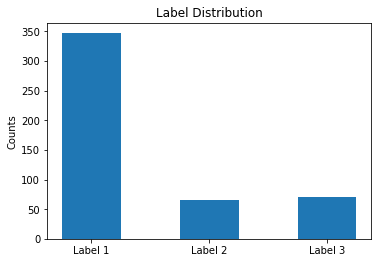

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure()
graph = fig.add_axes([0,0,0.75,0.75])
labels = ['Label 1', 'Label 2', 'Label 3']
counts = [347,65,71]
graph.bar(labels,counts,width = 0.5)
graph.set_ylabel('Counts')
graph.set_title('Label Distribution')
plt.show()


## Combine labels to make a binary classification problem

In [20]:
binary_labels = [] # make new vector to store binarized labels

for i in range (0,len(complete_labels)):
    if complete_labels[i] == 1:
        binary_labels.append(0)
    else:
        binary_labels.append(1)

#for i in range (0,len(complete_labels)):
 #   print(complete_labels[i], "--->" , binary_labels[i]) # print to check binarized labels

In [21]:
X = a
Y = binary_labels


In [22]:
count_0 =0
count_1 =0
for i in Y:
    if i == 0:
        count_0= count_0 + 1 
    else:
        count_1 = count_1 + 1
print(count_0)
print(count_1)

347
136


### Binary Lable Distribution

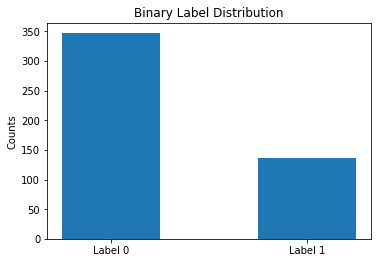

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
graph = fig.add_axes([0,0,0.75,0.75])
labels = ['Label 0', 'Label 1']
counts = [347,136]
graph.bar(labels,counts,width = 0.5)
graph.set_ylabel('Counts')
x = np.arange(len(labels))
graph.set_title('Binary Label Distribution')
plt.show()

### Split into train-test

In [24]:
from sklearn.model_selection import train_test_split

# split data to train and test so that the models can be trained and tested

X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size= 0.30,random_state = 653)

In [25]:
print(len(X_train))
print(len(X_test))

338
145


### Label encoder

In [26]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Y_train)
Test_Y = Encoder.fit_transform(Y_test)

## Word counts

### Unique words in the whole data

In [27]:
import numpy

all_features =[]
for i in a:
  x= numpy.array(i)
  for j in x:
    all_features.append(j)

unique_words = numpy.unique(all_features)
len(numpy.unique(all_features))

33026

### Mean words

In [28]:
all_features =[]
total_count =0
for i in a:
  x= numpy.array(i)
  all_features.append(x)

for i in all_features:
  total_count = len(i) + total_count
total_count / len(all_features)

1801.9233954451345

### largest feature vector

In [29]:
all_features =[]
max =0
for i in a:
  x= numpy.array(i)
  all_features.append(x)

for i in all_features:
  if len(i) >=max:
    max = len(i)

print("Maximum words in a transcript are :", max)


Maximum words in a transcript are : 17936


### count of words for each transcript

In [30]:
all_features =[]
all_counts= []
for i in a:
  x= numpy.array(i)
  all_features.append(x)

for i in all_features:
  all_counts.append(len(i))
numpy.max(all_counts)

17936

Text(0, 0.5, 'word count')

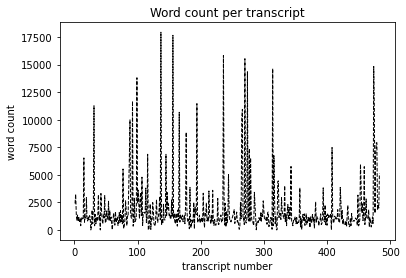

In [31]:
import matplotlib.pyplot as plt
y = all_counts
x = []
for i in range (1,484):
  x.append(i)
plt.plot(x, y, color='black', linestyle='dashed', linewidth = 1 ) 
plt.title("Word count per transcript")
plt.xlabel("transcript number")
plt.ylabel("word count")

#4- TF-IDF Feature extractions

### Prepare data for TF_IDF

In [32]:
#prepare train data for TF_IDF transfrom
tf_data_train= []
for transcript in X_train:
    tf_data_train.append(" ".join(transcript))
    

In [33]:
#prepare test data for TF_IDF transfrom
tf_data_test= []
for transcript in X_test:
    tf_data_test.append(" ".join(transcript))

In [34]:
print(len(tf_data_test))
print(len(tf_data_train))

145
338


In [35]:
all_data_for_tf = []
for i in tf_data_test:
    all_data_for_tf.append(i)
for j in tf_data_train:
    all_data_for_tf.append(j)
    
    

In [36]:
clean_data = all_data_for_tf

### Train TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
Tfidf_vect = TfidfVectorizer(max_features=4000)
Tfidf_vect.fit(all_data_for_tf)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=4000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [39]:
Train_X_Tfidf = Tfidf_vect.transform(tf_data_train).toarray()
Test_X_Tfidf = Tfidf_vect.transform(tf_data_test).toarray()


In [40]:
Train_X_Tfidf1 = Tfidf_vect.transform(tf_data_train)
Test_X_Tfidf1 = Tfidf_vect.transform(tf_data_test)

### TF-IDF bigram

In [41]:
bigram_Tfidf_vect = TfidfVectorizer(max_features=4000,ngram_range=(2,2))
bigram_Tfidf_vect.fit(all_data_for_tf)

bigram_Train_X_Tfidf = bigram_Tfidf_vect.transform(tf_data_train)
bigram_Test_X_Tfidf = bigram_Tfidf_vect.transform(tf_data_test)

### TF-IDF tri-gram

In [42]:
trigram_Tfidf_vect = TfidfVectorizer(max_features=4000,ngram_range=(3,3))
trigram_Tfidf_vect.fit(all_data_for_tf)

trigram_Train_X_Tfidf = trigram_Tfidf_vect.transform(tf_data_train)
trigram_Test_X_Tfidf = trigram_Tfidf_vect.transform(tf_data_test)

### TF-IDF (1-to-3) gram

In [43]:
multigram_Tfidf_vect = TfidfVectorizer(max_features=4000,ngram_range=(1,3))
multigram_Tfidf_vect.fit(all_data_for_tf)

multigram_Train_X_Tfidf = trigram_Tfidf_vect.transform(tf_data_train)
multigram_Test_X_Tfidf = trigram_Tfidf_vect.transform(tf_data_test)

In [44]:
#print(Tfidf_vect.vocabulary_) # to check the vocabulary

#5- Train Models on TF IDF (original dataset)

## 1.Naive Bayes

In [45]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
from sklearn.naive_bayes import BernoulliNB

# Defince NB classifiers
Naive =BernoulliNB()
bigram_Naive =BernoulliNB()
trigram_Naive =BernoulliNB()
multigram_Naive =BernoulliNB()


In [47]:

# fit the training dataset on the NB classifier
Naive.fit(Train_X_Tfidf1,Train_Y)
bigram_Naive.fit(bigram_Train_X_Tfidf,Train_Y)
trigram_Naive.fit(trigram_Train_X_Tfidf,Train_Y)
multigram_Naive.fit(multigram_Train_X_Tfidf,Train_Y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [48]:
# predict the labels on Test dataset
predictions_NB = Naive.predict(Test_X_Tfidf1)
bigram_predictions_NB = bigram_Naive.predict(bigram_Test_X_Tfidf)
trigram_predictions_NB = trigram_Naive.predict(trigram_Test_X_Tfidf)
multigram_predictions_NB = trigram_Naive.predict(multigram_Test_X_Tfidf)

In [49]:
#print(confusion_matrix(Test_X_Tfidf, Y_test))
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print("Bi-gram Naive Bayes Accuracy Score -> ",accuracy_score(bigram_predictions_NB, Test_Y)*100)
print("Tri-gram Naive Bayes Accuracy Score -> ",accuracy_score(trigram_predictions_NB, Test_Y)*100)
print("Multi-gram Naive Bayes Accuracy Score -> ",accuracy_score(multigram_predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  78.62068965517241
Bi-gram Naive Bayes Accuracy Score ->  77.24137931034483
Tri-gram Naive Bayes Accuracy Score ->  76.55172413793103
Multi-gram Naive Bayes Accuracy Score ->  76.55172413793103


In [50]:
print("Naive Bayes Classification Report")
print(classification_report(Test_Y,predictions_NB, digits=4))
print("------------------------------------------")

print("Bi-gram Naive Bayes Classification Report")
print(classification_report(Test_Y,bigram_predictions_NB, digits=4))

print("------------------------------------------")

print("Tri-gram Naive Bayes Classification Report")
print(classification_report(Test_Y,trigram_predictions_NB, digits=4))

print("------------------------------------------")

print("Multi-gram Naive Bayes Classification Report")
print(classification_report(Test_Y,multigram_predictions_NB, digits=4))

Naive Bayes Classification Report
              precision    recall  f1-score   support

           0     0.8017    0.9327    0.8622       104
           1     0.7083    0.4146    0.5231        41

    accuracy                         0.7862       145
   macro avg     0.7550    0.6737    0.6926       145
weighted avg     0.7753    0.7862    0.7663       145

------------------------------------------
Bi-gram Naive Bayes Classification Report
              precision    recall  f1-score   support

           0     0.7795    0.9519    0.8571       104
           1     0.7222    0.3171    0.4407        41

    accuracy                         0.7724       145
   macro avg     0.7509    0.6345    0.6489       145
weighted avg     0.7633    0.7724    0.7394       145

------------------------------------------
Tri-gram Naive Bayes Classification Report
              precision    recall  f1-score   support

           0     0.7652    0.9712    0.8559       104
           1     0.7692    0.243

## 2. SVM

In [51]:
from sklearn import svm
# Classifier - Algorithm - SVM
SVM =svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
bigram_SVM=svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
trigram_SVM =svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
multigram_SVM =svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')



In [52]:
# fit the training dataset on the classifier

SVM.fit(Train_X_Tfidf1,Train_Y)
bigram_SVM.fit(bigram_Train_X_Tfidf,Train_Y)
trigram_SVM.fit(trigram_Train_X_Tfidf,Train_Y)
multigram_SVM.fit(multigram_Train_X_Tfidf,Train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
# predict the labels on Test dataset
predictions_SVM = SVM.predict(Test_X_Tfidf1)
bigram_predictions_SVM = bigram_SVM.predict(bigram_Test_X_Tfidf)
trigram_predictions_SVM = trigram_SVM.predict(trigram_Test_X_Tfidf)
multigram_predictions_SVM = trigram_SVM.predict(multigram_Test_X_Tfidf)

In [54]:


print("Uni gram model SVM Classification Report")
print(classification_report(Test_Y,predictions_SVM, digits=4))
print("------------------------------------------")

print("Bi-gram SVM Classification Report")
print(classification_report(Test_Y,bigram_predictions_SVM, digits=4))

print("------------------------------------------")

print("Tri-gram SVM Classification Report")
print(classification_report(Test_Y,trigram_predictions_SVM, digits=4))

print("------------------------------------------")

print("Multi-gram SVM Classification Report")
print(classification_report(Test_Y,multigram_predictions_SVM, digits=4))

Uni gram model SVM Classification Report
              precision    recall  f1-score   support

           0     0.8829    0.9423    0.9116       104
           1     0.8235    0.6829    0.7467        41

    accuracy                         0.8690       145
   macro avg     0.8532    0.8126    0.8291       145
weighted avg     0.8661    0.8690    0.8650       145

------------------------------------------
Bi-gram SVM Classification Report
              precision    recall  f1-score   support

           0     0.8632    0.9712    0.9140       104
           1     0.8929    0.6098    0.7246        41

    accuracy                         0.8690       145
   macro avg     0.8781    0.7905    0.8193       145
weighted avg     0.8716    0.8690    0.8605       145

------------------------------------------
Tri-gram SVM Classification Report
              precision    recall  f1-score   support

           0     0.7574    0.9904    0.8583       104
           1     0.8889    0.1951    0.32

## 3. Logistic Regression

In [55]:
from sklearn.linear_model import SGDClassifier

# Define Log Reg classifiers
Log_Reg = SGDClassifier(loss='log', random_state=123)
bigram_Log_Reg = SGDClassifier(loss='log', random_state=123)
trigram_Log_Reg = SGDClassifier(loss='log', random_state=123)
multigram_Log_Reg = SGDClassifier(loss='log', random_state=123)



In [56]:
# fit the training dataset on the Logistic Regression models
Log_Reg.fit(Train_X_Tfidf1,Train_Y)
bigram_Log_Reg.fit(bigram_Train_X_Tfidf,Train_Y)
trigram_Log_Reg.fit(trigram_Train_X_Tfidf,Train_Y)
multigram_Log_Reg.fit(multigram_Train_X_Tfidf,Train_Y)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
# predict the labels on Test dataset
predictions_Log_reg = Log_Reg.predict(Test_X_Tfidf1)
bigram_predictions_Log_reg = bigram_Log_Reg.predict(bigram_Test_X_Tfidf)
trigram_predictions_Log_reg = trigram_Log_Reg.predict(trigram_Test_X_Tfidf)
multigram_predictions_Log_reg = trigram_Log_Reg.predict(multigram_Test_X_Tfidf)


In [58]:
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_Log_reg, Test_Y)*100)

Logistic Regression Accuracy Score ->  87.58620689655172


In [59]:
print("Uni-gram Logistic Regression Classification Reports")

print(classification_report(Test_Y,predictions_Log_reg, digits=4))
print("------------------------------------------")

print("Bi-gram Logistic Regression Classification Report")
print(classification_report(Test_Y,bigram_predictions_Log_reg, digits=4))

print("------------------------------------------")

print("Tri-gram Logistic Regression Classification Report")
print(classification_report(Test_Y,trigram_predictions_Log_reg, digits=4))

print("------------------------------------------")

print("Multi-gram Logistic Regression Classification Report")
print(classification_report(Test_Y,multigram_predictions_Log_reg, digits=4))


Uni-gram Logistic Regression Classification Reports
              precision    recall  f1-score   support

           0     0.9057    0.9231    0.9143       104
           1     0.7949    0.7561    0.7750        41

    accuracy                         0.8759       145
   macro avg     0.8503    0.8396    0.8446       145
weighted avg     0.8743    0.8759    0.8749       145

------------------------------------------
Bi-gram Logistic Regression Classification Report
              precision    recall  f1-score   support

           0     0.8621    0.9615    0.9091       104
           1     0.8621    0.6098    0.7143        41

    accuracy                         0.8621       145
   macro avg     0.8621    0.7856    0.8117       145
weighted avg     0.8621    0.8621    0.8540       145

------------------------------------------
Tri-gram Logistic Regression Classification Report
              precision    recall  f1-score   support

           0     0.7612    0.9808    0.8571       10

# 6- Increase data set (SMOTE)

### Increase the minority class using SMOTE


In [60]:
pip install imbalanced-learn

In [61]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [62]:
sm = SMOTE(random_state =653)

In [63]:
# transform all data to TF_idf form
Combined_Tfidf = Tfidf_vect.transform(all_data_for_tf).toarray()
labels = Y

### Increase unigram data

In [64]:
# increase TF-IDF data 
unigram_X_train_inc, unigram_y_train_inc= sm.fit_sample(Train_X_Tfidf1,Train_Y)
unigram_X_test_inc, unigram_y_test_inc= sm.fit_sample(Test_X_Tfidf1,Test_Y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Increase bi-gram data

In [65]:
# increase TF-IDF bigram data 
bigram_X_train_inc, bigram_y_train_inc= sm.fit_sample(bigram_Train_X_Tfidf,Train_Y)
bigram_X_test_inc, bigram_y_test_inc= sm.fit_sample(bigram_Test_X_Tfidf,Test_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Increase tri-gram data

In [66]:
trigram_X_train_inc, trigram_y_train_inc= sm.fit_sample(trigram_Train_X_Tfidf,Train_Y)
trigram_X_test_inc, trigram_y_test_inc= sm.fit_sample(trigram_Test_X_Tfidf,Test_Y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Increase (1-to-3)gram data

In [67]:
multigram_X_train_inc, multigram_y_train_inc= sm.fit_sample(multigram_Train_X_Tfidf,Train_Y)
multigram_X_test_inc, multigram_y_test_inc= sm.fit_sample(multigram_Test_X_Tfidf,Test_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Check count of labels before and after inc

In [68]:
# check count of labels before smote
count_1 = 0
count_0 = 0
for i in Train_Y:
    if i ==1:
        count_1 = count_1 + 1
    else:
        count_0 = count_0 + 1
for i in Test_Y:
    if i ==1:
        count_1 = count_1 + 1
    else:
        count_0 = count_0 + 1
print("before smote numeber of 0 labels = ", count_0)
print("before smote numeber of 1 labels = ", count_1)

before smote numeber of 0 labels =  347
before smote numeber of 1 labels =  136


In [69]:
# check count of labels after smote
count_1 = 0
count_0 = 0
for i in multigram_y_train_inc:
    if i ==1:
        count_1 = count_1 + 1
    else:
        count_0 = count_0 + 1
for i in multigram_y_test_inc:
    if i ==1:
        count_1 = count_1 + 1
    else:
        count_0 = count_0 + 1
print("After smote numeber of 0 labels = ", count_0)
print("After smote numeber of 1 labels = ", count_1)

After smote numeber of 0 labels =  347
After smote numeber of 1 labels =  347


In [70]:
# run sm on all data to balance data
X_train_inc, y_train_inc = sm.fit_sample(Combined_Tfidf, labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [71]:
# check count of labels before smote
count_1 = 0
count_0 = 0
for i in labels:
    if i ==1:
        count_1 = count_1 + 1
    else:
        count_0 = count_0 + 1
print("before smote numeber of 0 labels = ", count_0)
print("before smote numeber of 1 labels = ", count_1)

before smote numeber of 0 labels =  347
before smote numeber of 1 labels =  136


In [72]:
# check count of labels after smote
count_1 = 0
count_0 = 0
for i in y_train_inc:
    if i ==1:
        count_1 = count_1 + 1
    else:
        count_0 = count_0 + 1
print("before smote numeber of 0 labels = ", count_0)
print("before smote numeber of 1 labels = ", count_1)

before smote numeber of 0 labels =  347
before smote numeber of 1 labels =  347


In [73]:
# split balanced data into train and test
X_train,X_test,Y_train, Y_test = train_test_split(X_train_inc,y_train_inc,test_size= 0.28,random_state = 653)

In [74]:
print(len(X_train))
print(len(X_test))

499
195


#7- Run models on increased TF_IDF dataset

#### 1.SVM

In [75]:
# Run SVM on bigger data to check performance
from sklearn import svm
# Classifier - Algorithm - SVM
# Initialize the Logistic Regression classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
bigram_SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
trigram_SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
multigram_SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')



In [76]:

# fit the training dataset on the classifier
SVM.fit(unigram_X_train_inc, unigram_y_train_inc)
bigram_SVM.fit(bigram_X_train_inc, bigram_y_train_inc)
trigram_SVM.fit(trigram_X_train_inc, trigram_y_train_inc)
multigram_SVM.fit(multigram_X_train_inc, multigram_y_train_inc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
# predict the labels on validation dataset
predictions_SVM = SVM.predict(unigram_X_test_inc)
bigram_predictions_SVM = bigram_SVM.predict(bigram_X_test_inc)
trigram_predictions_SVM = trigram_SVM.predict(trigram_X_test_inc)
multigram_predictions_SVM = multigram_SVM.predict(multigram_X_test_inc)


In [78]:
print("uni-gram classification report")
print(classification_report(unigram_y_test_inc,predictions_SVM, digits=4))
print("--------------------------------------")
print("Bi-gram classification report")
print(classification_report(bigram_y_test_inc,bigram_predictions_SVM, digits=4))

print("--------------------------------------")
print("Tri-gram classification report")
print(classification_report(trigram_y_test_inc,trigram_predictions_SVM, digits=4))

print("--------------------------------------")
print("Multi-gram classification report")
print(classification_report(multigram_y_test_inc,multigram_predictions_SVM, digits=4))

uni-gram classification report
              precision    recall  f1-score   support

           0     0.8421    0.9231    0.8807       104
           1     0.9149    0.8269    0.8687       104

    accuracy                         0.8750       208
   macro avg     0.8785    0.8750    0.8747       208
weighted avg     0.8785    0.8750    0.8747       208

--------------------------------------
Bi-gram classification report
              precision    recall  f1-score   support

           0     0.7874    0.9615    0.8658       104
           1     0.9506    0.7404    0.8324       104

    accuracy                         0.8510       208
   macro avg     0.8690    0.8510    0.8491       208
weighted avg     0.8690    0.8510    0.8491       208

--------------------------------------
Tri-gram classification report
              precision    recall  f1-score   support

           0     0.5698    0.9808    0.7208       104
           1     0.9310    0.2596    0.4060       104

    accuracy

#### 2.Naive Bayes

In [79]:
from sklearn.naive_bayes import MultinomialNB

# Define the NB classifiers
Naive =BernoulliNB()
bigram_Naive =BernoulliNB()
triigram_Naive =BernoulliNB()
multigram_Naive =BernoulliNB()


In [80]:

# fit the training dataset on the NB classifier
Naive.fit(unigram_X_train_inc, unigram_y_train_inc)
bigram_Naive.fit(bigram_X_train_inc, bigram_y_train_inc)
trigram_Naive.fit(trigram_X_train_inc, trigram_y_train_inc)
multigram_Naive.fit(multigram_X_train_inc, multigram_y_train_inc)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [81]:

# predict the labels on validation dataset
predictions_NB = Naive.predict(unigram_X_test_inc)
bigram_predictions_NB = bigram_Naive.predict(bigram_X_test_inc)
trigram_predictions_NB = trigram_Naive.predict(trigram_X_test_inc)
multigram_predictions_NB = multigram_Naive.predict(multigram_X_test_inc)





In [82]:

#print(confusion_matrix(Test_X_Tfidf, Y_test))
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, unigram_y_test_inc)*100)

#print(confusion_matrix(Test_X_Tfidf, Y_test))
print("Bi-gram Naive Bayes Accuracy Score -> ",accuracy_score(bigram_predictions_NB, bigram_y_test_inc)*100)

print("Tri-gram Naive Bayes Accuracy Score -> ",accuracy_score(trigram_predictions_NB, trigram_y_test_inc)*100)

print("Multi-gram Naive Bayes Accuracy Score -> ",accuracy_score(multigram_predictions_NB, multigram_y_test_inc)*100)




Naive Bayes Accuracy Score ->  80.76923076923077
Bi-gram Naive Bayes Accuracy Score ->  75.96153846153845
Tri-gram Naive Bayes Accuracy Score ->  59.61538461538461
Multi-gram Naive Bayes Accuracy Score ->  59.61538461538461


In [83]:

print("uni-gram classification report")
print(classification_report(unigram_y_test_inc,predictions_NB, digits=4))
print("--------------------------------------")
print("Bi-gram classification report")
print(classification_report(bigram_y_test_inc,bigram_predictions_NB, digits=4))

print("--------------------------------------")
print("Tri-gram classification report")
print(classification_report(trigram_y_test_inc,trigram_predictions_NB, digits=4))

print("--------------------------------------")
print("Multi-gram classification report")
print(classification_report(multigram_y_test_inc,multigram_predictions_NB, digits=4))

uni-gram classification report
              precision    recall  f1-score   support

           0     0.7353    0.9615    0.8333       104
           1     0.9444    0.6538    0.7727       104

    accuracy                         0.8077       208
   macro avg     0.8399    0.8077    0.8030       208
weighted avg     0.8399    0.8077    0.8030       208

--------------------------------------
Bi-gram classification report
              precision    recall  f1-score   support

           0     0.6800    0.9808    0.8031       104
           1     0.9655    0.5385    0.6914       104

    accuracy                         0.7596       208
   macro avg     0.8228    0.7596    0.7473       208
weighted avg     0.8228    0.7596    0.7473       208

--------------------------------------
Tri-gram classification report
              precision    recall  f1-score   support

           0     0.5538    0.9904    0.7103       104
           1     0.9545    0.2019    0.3333       104

    accuracy

### 3. Log Reg

In [84]:
from sklearn.linear_model import SGDClassifier
Log_Reg = SGDClassifier(loss='log', random_state=123)

# Initialize the Logistic Regression classifier
Log_Reg =SGDClassifier(loss='log', random_state=123)
bigram_Log_Reg =SGDClassifier(loss='log', random_state=123)
trigram_Log_Reg =SGDClassifier(loss='log', random_state=123)
multigram_Log_Reg =SGDClassifier(loss='log', random_state=123)


In [85]:

# fit the training dataset on the Logistic Regression classifier
Log_Reg.fit(unigram_X_train_inc, unigram_y_train_inc)
bigram_Log_Reg.fit(bigram_X_train_inc, bigram_y_train_inc)
trigram_Log_Reg.fit(trigram_X_train_inc, trigram_y_train_inc)
multigram_Log_Reg.fit(multigram_X_train_inc, multigram_y_train_inc)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
# predict the labels on validation dataset
predictions_Log_Reg = Log_Reg.predict(unigram_X_test_inc)
bigram_predictions_Log_Reg = bigram_Log_Reg.predict(bigram_X_test_inc)
trigram_predictions_Log_Reg = trigram_Log_Reg.predict(trigram_X_test_inc)
multigram_predictions_Log_Reg = multigram_Log_Reg.predict(multigram_X_test_inc)

In [87]:
# print confusion matrix
print("uni-gram classification report")
print(classification_report(unigram_y_test_inc,predictions_Log_Reg, digits=4))
print("--------------------------------------")
print("Bi-gram classification report")
print(classification_report(bigram_y_test_inc,bigram_predictions_Log_Reg, digits=4))

print("--------------------------------------")
print("Tri-gram classification report")
print(classification_report(trigram_y_test_inc,trigram_predictions_Log_Reg, digits=4))

print("--------------------------------------")
print("Multi-gram classification report")
print(classification_report(multigram_y_test_inc,multigram_predictions_Log_Reg, digits=4))

uni-gram classification report
              precision    recall  f1-score   support

           0     0.8496    0.9231    0.8848       104
           1     0.9158    0.8365    0.8744       104

    accuracy                         0.8798       208
   macro avg     0.8827    0.8798    0.8796       208
weighted avg     0.8827    0.8798    0.8796       208

--------------------------------------
Bi-gram classification report
              precision    recall  f1-score   support

           0     0.8197    0.9615    0.8850       104
           1     0.9535    0.7885    0.8632       104

    accuracy                         0.8750       208
   macro avg     0.8866    0.8750    0.8741       208
weighted avg     0.8866    0.8750    0.8741       208

--------------------------------------
Tri-gram classification report
              precision    recall  f1-score   support

           0     0.5763    0.9808    0.7260       104
           1     0.9355    0.2788    0.4296       104

    accuracy